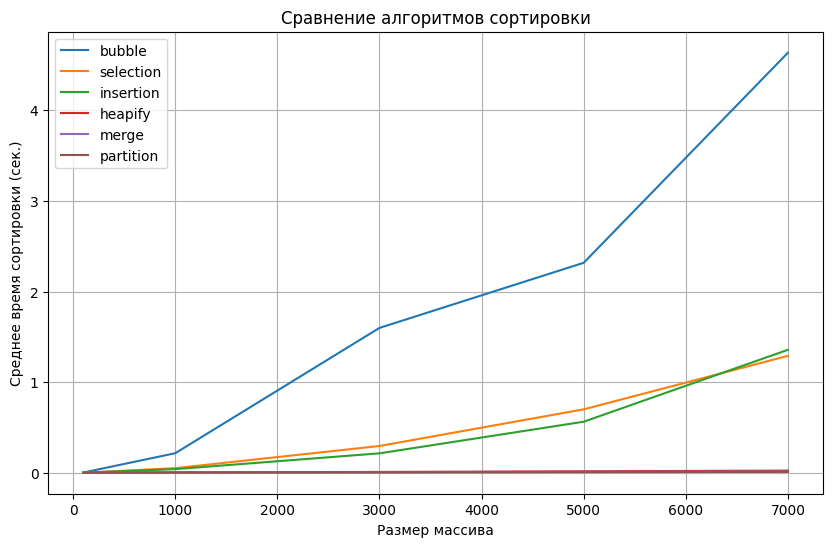

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

# Пузырьковая сортировка (Bubble Sort)
def bubble_sort(nums):
  # We set swapped to True so the loop looks runs at least once
  swapped = True
  while swapped:
    swapped = False
    for i in range(len(nums) - 1):
      if nums[i] > nums[i + 1]:
        # Swap the elements
        nums[i], nums[i + 1] = nums[i + 1], nums[i]
        # Set the flag to True so we'll loop again
        swapped = True


# Сортировка выбором (Selection Sort)
def selection_sort(nums):
  # значение i соответствует тому, сколько значений было
  # отсортировано
  for i in range(len(nums)):
    # Мы предполагаем, что первый элемент несортированного
    # сегмента является наименьшим
    lowest_value_index = i
    # Этот цикл перебирает несортированные элементы
    for j in range(i + 1, len(nums)):
      if nums[j] < nums[lowest_value_index]:
        lowest_value_index = j
    # Поменять местами значения самого низкого
    # несортированного элемента с первым несортированным
    nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]


# Сортировка вставками (Insertion Sort)
def insertion_sort(nums):
  # Начнем со второго элемента, так как мы предполагаем, что
  # первый элемент отсортирован
  for i in range(1, len(nums)):
    item_to_insert = nums[i]
    # И сохранить ссылку на индекс предыдущего элемента
    j = i - 1
    # Переместить все элементы отсортированного сегмента
    # вперед, если они больше, чем элемент для вставки
    while j >= 0 and nums[j] > item_to_insert:
      nums[j + 1] = nums[j]
      j -= 1
    # Вставляем элемент
    nums[j + 1] = item_to_insert


# Пирамидальная сортировка (Heap Sort) (англ. Heapsort, «Сортировка кучей»)
def heapify(nums, heap_size, root_index):
  # Предположим, что индекс самого большого элемента является
  # корневым индексом
  largest = root_index
  left_child = (2 * root_index) + 1
  right_child = (2 * root_index) + 2

  # Если левый потомок корня является допустимым индексом, а
  # элемент больше
  # чем текущий самый большой элемент, то обновляем самый
  # большой элемент
  if left_child < heap_size and nums[left_child] > nums[largest]:
    largest = left_child

  # Делайте то же самое для right_child
  if right_child < heap_size and nums[right_child] > nums[largest]:
    largest = right_child

  # Если самый большой элемент больше не является корневым
  #элементом, меняем их местами
  if largest != root_index:
    nums[root_index], nums[largest] = nums[largest], nums[root_index]
    # Heapify the new root element to ensure it's the
    largest
    heapify(nums, heap_size, largest)


def heap_sort(nums):
  n = len(nums)

  # Создаем Max Heap из списка
  # Второй аргумент означает, что мы останавливаемся на
  # элементе перед -1, то есть на первом элементе списка.
  # Третий аргумент означает, что мы повторяем в обратном
  # направлении, уменьшая количество i на 1
  for i in range(n, -1, -1):
    heapify(nums, n, i)

  # Перемещаем корень max hea в конец
  for i in range(n - 1, 0, -1):
    nums[i], nums[0] = nums[0], nums[i]
    heapify(nums, i, 0)


# Сортировка слиянием (Merge Sort)
def merge(left_list, right_list):
  sorted_list = []
  left_list_index = right_list_index = 0

  # Мы будет часто используем длины списков, поэтому удобно
  # сразу создавать переменные для этого
  left_list_length, right_list_length = len(left_list), len(right_list)

  for _ in range(left_list_length + right_list_length):
    if (left_list_index < left_list_length and
        right_list_index < right_list_length):
      # Мы проверяем, какое значение с начала каждого
      # списка меньше
      # Если элемент в начале левого списка меньше,
      # добавляем его в отсортированный список
      if left_list[left_list_index] <= right_list[right_list_index]:
        sorted_list.append(left_list[left_list_index])
        left_list_index += 1
      # Если элемент в начале правого списка меньше,
      # добавляем его в отсортированный список
      else:
        sorted_list.append(right_list[right_list_index])
        right_list_index += 1

    # Если мы достигли конца левого списка, добавляем
    # элементы из правого списка
    elif left_list_index == left_list_length:
      sorted_list.append(right_list[right_list_index])
      right_list_index += 1
    # Если мы достигли конца правого списка, добавляем
    # элементы из левого списка
    elif right_list_index == right_list_length:
      sorted_list.append(left_list[left_list_index])
      left_list_index += 1

  return sorted_list


def merge_sort(nums):
  # Если список представляет собой один элемент, возвращаем его
  if len(nums) <= 1:
    return nums

  # Используем деление с округленим по наименьшему целому для
  # получения средней точки, индексы должны быть целыми числами
  mid = len(nums) // 2

  # Сортируем и объединяем каждую половину
  left_list = merge_sort(nums[:mid])
  right_list = merge_sort(nums[mid:])

  # Объединить отсортированные списки в новый
  return merge(left_list, right_list)


# Быстрая сортировка (Quick Sort)
# Есть разные способы реализовать быструю сортировки
# мы выбрали схема Tony Hoare
def partition(nums, low, high):
  # Мы выбираем средний элемент, в качестве опорного.
  # Некоторые реализации выбирают
  # первый элемент или последний элемент или вообще случайный
  # элемент.
  pivot = nums[(low + high) // 2]
  i = low - 1
  j = high + 1
  while True:
    i += 1
    while nums[i] < pivot:
      i += 1

    j -= 1
    while nums[j] > pivot:
      j -= 1

    if i >= j:
      return j

    # Если элемент в i (слева от оси) больше, чем
    # элемент в J (справа от оси), то поменять их местами
    nums[i], nums[j] = nums[j], nums[i]


def quick_sort(nums):
  # Создаем вспомогательную рекурсивную функцию
  def _quick_sort(items, low, high):
    if low < high:
    # Это индекс после опорного элемента, по которому
    # наши списки разделены
      split_index = partition(items, low, high)
      _quick_sort(items, low, split_index)
      _quick_sort(items, split_index + 1, high)

  _quick_sort(nums, 0, len(nums) - 1)

sizes = [100, 1000, 3000, 5000, 7000]
results = {'bubble': [], 'selection': [], 'insertion': [], 'heapify': [],
          'merge': [], 'partition': []}

def measure(sort_func, arr):
  total = 0
  for _ in range(10):
    data = arr.copy()
    start = time.perf_counter()
    sort_func(data)
    end = time.perf_counter()
    total += (end - start)
  return total / 10


for n in sizes:
  base_array = [random.randint(0, 1000) for _ in range(n)]
  results['bubble'].append(measure(bubble_sort, base_array))
  results['selection'].append(measure(selection_sort, base_array))
  results['insertion'].append(measure(insertion_sort, base_array))
  results['heapify'].append(measure(heap_sort, base_array))
  results['merge'].append(measure(merge_sort, base_array))
  results['partition'].append(measure(quick_sort, base_array))

plt.figure(figsize=(10, 6))
for key, values in results.items():
  plt.plot(sizes[:len(values)], values, label=key)
plt.xlabel('Размер массива')
plt.ylabel('Среднее время сортировки (сек.)')
plt.title('Сравнение алгоритмов сортировки')
plt.legend()
plt.grid(True)
plt.show()
